In [65]:
import h5py
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
from IPython.display import display, JSON
import pprint

In [137]:
data_dir = '/data/xenon/acolijn/optosim/data/mc0000/'

In [138]:
# Get a list of all HDF5 files in the current directory
hdf5_files = glob.glob(data_dir+'*0001.hd5f')
print(hdf5_files)

# Read each file
xp = []
yp = []
q_tb = []
q_lr = []
q_tot = []

first_file = True
for hdf5_file in hdf5_files:
    with h5py.File(hdf5_file, 'r') as f:
        print(f"Reading file: {hdf5_file}")
        config = f.attrs['config']

        if first_file:
            display(config)
            first_file = False
        events_group = f['events']

        # Loop through all events in the events group
        for event_name, event_group in events_group.items():
            # Extract PMT and fine signals for each event
            x_true = event_group['true_position'][()]
            xp.append(x_true[0])
            yp.append(x_true[1])
            
            
            pmt = event_group['pmt_top'][()]
            qtot = float(np.sum(pmt))
            q_tb.append((pmt[0][0]+pmt[1][0])/qtot)
            q_lr.append((pmt[0][0]+pmt[0][1])/qtot)
            q_tot.append(qtot)
            
            fine_signal_top = event_group['fine_top'][()]
            pmt_signal_bot = event_group['pmt_bot'][()]
            fine_signal_bot = event_group['fine_bot'][()]
            
print('Done')

['/data/xenon/acolijn/optosim/data/mc0000/mc0000.mc0001.hd5f']
Reading file: /data/xenon/acolijn/optosim/data/mc0000/mc0000.mc0001.hd5f


'{"nevents": 10000, "nphoton_per_event": 10000, "photon_zgen": 0.1, "geometry": {"type": "cylinder", "radius": 2.5, "ztop": 1.0, "zliq": 0.0, "zbot": -5.0}, "npmt_xy": 2, "pmt": {"type": "square", "size": 2.54, "ndivs": 10}, "filename": "/data/xenon/acolijn/optosim/data/mc0000/mc0000.mc0001.hd5f"}'

Done


Text(0, 0.5, '$Q_B / Q_{tot}$')

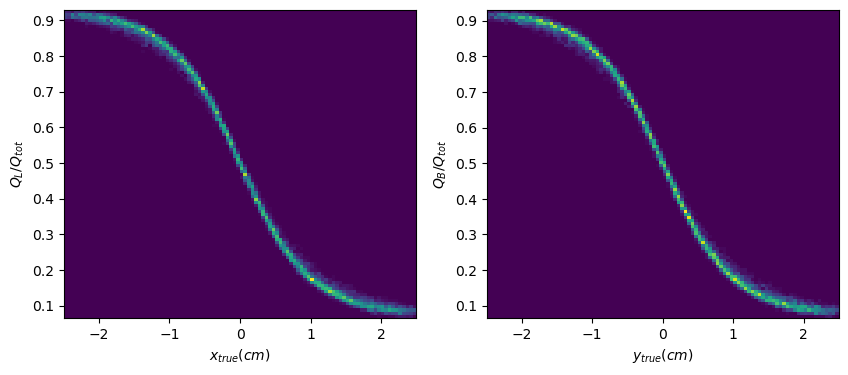

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

h1 = axs[0].hist2d(xp,q_lr,bins=(100,100))
axs[0].set_xlabel('$x_{true} (cm)$')
axs[0].set_ylabel('$Q_L / Q_{tot}$')

h2 = axs[1].hist2d(yp,q_tb,bins=(100,100))
axs[1].set_xlabel('$y_{true} (cm)$')
axs[1].set_ylabel('$Q_B / Q_{tot}$')

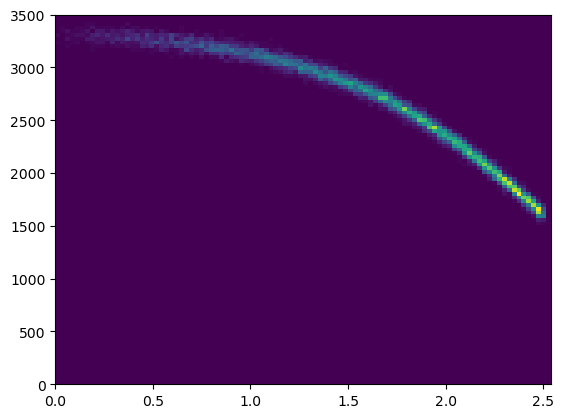

In [140]:
xp = np.array(xp)
yp = np.array(yp)
q_tot = np.array(q_tot)
r2 = np.sqrt(xp**2+yp**2)
h=plt.hist2d(r2,q_tot,bins=100, range=((0,2.54),(0,3500)))

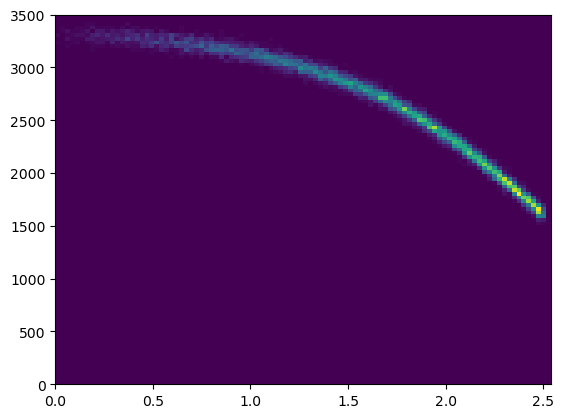

In [141]:
xp = np.array(xp)
yp = np.array(yp)
q_tot = np.array(q_tot)
r2 = np.sqrt(xp**2+yp**2)
h=plt.hist2d(r2,q_tot,bins=100, range=((0,2.54),(0,3500)))

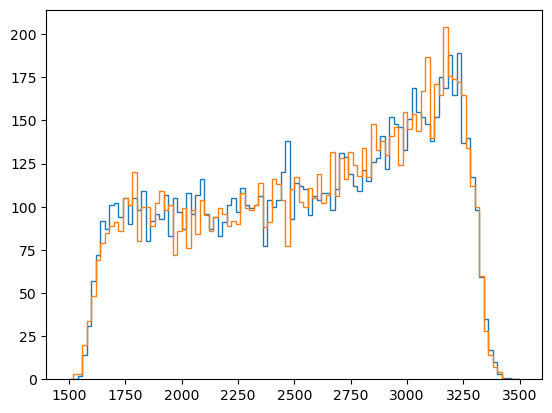

In [142]:
plt.hist(q_tot_noscat, bins=100, range=(1500,3500), histtype='step')
plt.hist(q_tot,  bins=100, range=(1500,3500), histtype='step')
plt.show()

In [136]:
q_tot_noscat = q_tot

{'filename': '/data/xenon/acolijn/optosim/data/event0.hd5f', 'nevents': 10000, 'nphoton_per_event': 10000, 'photon_zgen': 0.1, 'geometry': {'type': 'cylinder', 'radius': 2.5, 'ztop': 1.0, 'zliq': 0.0, 'zbot': -5.0}, 'npmt_xy': 2, 'pmt': {'type': 'square', 'size': 2.54, 'ndivs': 10}}
2.5
<HDF5 group "/events" (10000 members)>
0


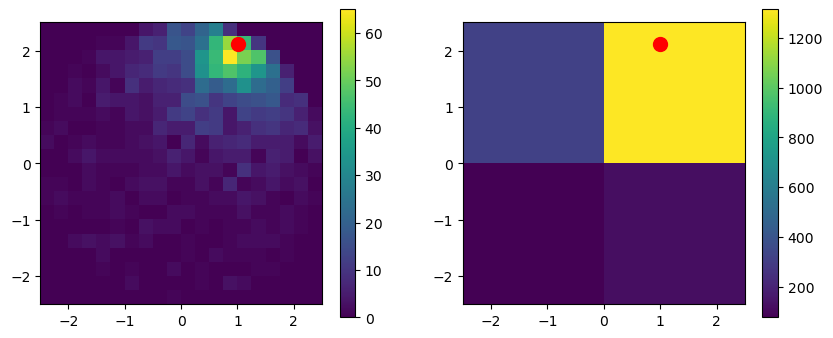

KeyboardInterrupt: Interrupted by user

In [27]:
# Open the HDF5 file in read mode
with h5py.File('/data/xenon/acolijn/optosim/data/mctest/event0.hd5f', 'r') as hf:
    
    # Access the 'config' group
    config = json.loads(hf.attrs['config'])
    print(config)
    print(config['geometry']['radius'])
    r = config['geometry']['radius']

    # Print the structure of the 'events' dataset
    events = hf['events']
    print(events)

    # Iterate over the elements in the dataset
    for event in events:
        event = events[event]
        print(event['number'][()])

        truth = np.array(event['true_position'])
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        fine = np.array(event['fine'])
        im = axs[0].imshow(fine.T, cmap='viridis', interpolation='nearest', origin='lower', extent=[-r,r,-r,r])
        plt.colorbar(im, ax=axs[0])
        axs[0].plot(truth[0], truth[1], marker='o', markersize=10, color='red', label='Marker')

        pmt = np.array(event['pmt'])
        im = axs[1].imshow(pmt.T, cmap='viridis', interpolation='nearest', origin='lower', extent=[-r,r,-r,r])
        plt.colorbar(im, ax=axs[1])
        axs[1].plot(truth[0], truth[1], marker='o', markersize=10, color='red', label='Marker')

        plt.show()
        input("Press Enter to continue to the next event...")